# Higgs Boson Detection 2024
*Searching for exotic particles in high-energy physics with machine learning*

## Overview
The goal of this competition is to classify events into two classes: events that produce the exotic Higgs Boson particle, and those that do not. Each event is a simulated particle collision represented by 28 features that describe the trajectories of decay particles. These are realistic simulations of particle collisions occuring in the ATLAS detector at the Large Hadron Collider at CERN, near Geneva, Switzerland.

An analysis like this was used to discover the Higgs Boson in 2012; a machine learning classifier was trained on simulation and calibration data, then used to analyze real data from the experiment. Improved machine learning methods for this type of data could enable physicists to make new discoveries faster. It is thought that there are additional particles yet to be discovered, so more sensitive machine learning methods could help scientists discover new physics.

## Dataset

This data set is a sample from the HIGGS data set published with [Baldi, Sadowski, and Whiteson, Searching for Exotic Particles in High-Energy Physics with Deep Learning](https://www.nature.com/articles/ncomms5308) and available [here](https://archive.ics.uci.edu/ml/datasets/HIGGS).

In [1]:
%%bash
mkdir -p data

In [2]:
!wget "https://archive.ics.uci.edu/static/public/280/higgs.zip" -P data -q --show-progress

higgs.zip               [ <=>                ]   2.62G  55.8MB/s    in 55s     


In [3]:
!unzip data/higgs.zip

Archive:  data/higgs.zip
  inflating: HIGGS.csv.gz            


In [4]:
!gzip -d HIGGS.csv.gz

In [5]:
!ls

data  HIGGS.csv  sample_data


In [6]:
#Load the dataset using pandas and numpy

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [7]:
column_names = ['lable', 'lep_pt', 'lep_eta', 'lep_phi', 'MET', 'MET_phi', \
                'jet1_pt', 'jet1_eta', 'jet1_phi', 'jet1_btag', \
                'jet2_pt', 'jet2_eta', 'jet2_phi', 'jet2_btag', \
                'jet3_pt', 'jet3_eta', 'jet3_phi', 'jet3_btag', \
                'jet4_pt', 'jet4_eta', 'jet4_phi', 'jet4_btag', \
                'm_jj', 'm_jjj', 'm_lv', 'm_jlv', 'm_bb', 'm_wbb', 'm_wwbb']

In [8]:
df = pd.read_csv('HIGGS.csv', header=None, nrows=200000)
df.columns=column_names

In [9]:
df.head()

,lable,lep_pt,lep_eta,lep_phi,MET,MET_phi,jet1_pt,jet1_eta,jet1_phi,jet1_btag,...,jet4_eta,jet4_phi,jet4_btag,m_jj,m_jjj,m_lv,m_jlv,m_bb,m_wbb,m_wwbb
0,1.0,0.869293,-0.635082,0.225690,0.327470,-0.689993,0.754202,-0.248573,-1.092064,0.000000,...,-0.010455,-0.045767,3.101961,1.353760,0.979563,0.978076,0.920005,0.721657,0.988751,0.876678
1,1.0,0.907542,0.329147,0.359412,1.497970,-0.313010,1.095531,-0.557525,-1.588230,2.173076,...,-1.138930,-0.000819,0.000000,0.302220,0.833048,0.985700,0.978098,0.779732,0.992356,0.798343
2,1.0,0.798835,1.470639,-1.635975,0.453773,0.425629,1.104875,1.282322,1.381664,0.000000,...,1.128848,0.900461,0.000000,0.909753,1.108330,0.985692,0.951331,0.803252,0.865924,0.780118
3,0.0,1.344385,-0.876626,0.935913,1.992050,0.882454,1.786066,-1.646778,-0.942383,0.000000,...,-0.678379,-1.360356,0.000000,0.946652,1.028704,0.998656,0.728281,0.869200,1.026736,0.957904
4,1.0,1.105009,0.321356,1.522401,0.882808,-1.205349,0.681466,-1.070464,-0.921871,0.000000,...,-0.373566,0.113041,0.000000,0.755856,1.361057,0.986610,0.838085,1.133295,0.872245,0.808487


In [10]:
features_low = ['lep_pt', 'lep_eta', 'lep_phi', 'MET', 'MET_phi', \
                'jet1_pt', 'jet1_eta', 'jet1_phi', 'jet1_btag', \
                'jet2_pt', 'jet2_eta', 'jet2_phi', 'jet2_btag', \
                'jet3_pt', 'jet3_eta', 'jet3_phi', 'jet3_btag', \
                'jet4_pt', 'jet4_eta', 'jet4_phi', 'jet4_btag']

features_high = ['m_jj', 'm_jjj', 'm_lv', 'm_jlv', 'm_bb', 'm_wbb', 'm_wwbb']

features = ['lep_pt', 'lep_eta', 'lep_phi', 'MET', 'MET_phi', \
            'jet1_pt', 'jet1_eta', 'jet1_phi', 'jet1_btag', \
            'jet2_pt', 'jet2_eta', 'jet2_phi', 'jet2_btag', \
            'jet3_pt', 'jet3_eta', 'jet3_phi', 'jet3_btag', \
            'jet4_pt', 'jet4_eta', 'jet4_phi', 'jet4_btag', \
            'm_jj', 'm_jjj', 'm_lv', 'm_jlv', 'm_bb', 'm_wbb', 'm_wwbb']

In [11]:
Y = df['lable'].values
X = df[[col for col in features]]
# X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.3, random_state=0)

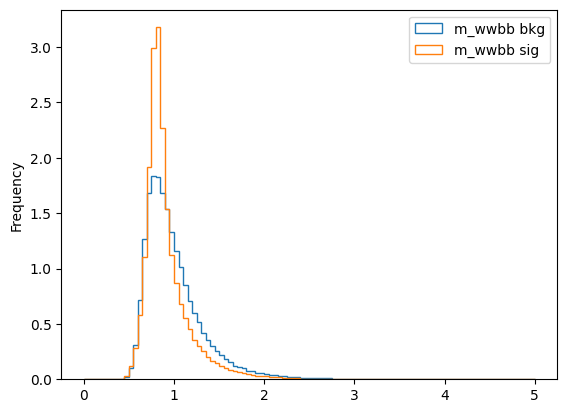

In [12]:
import matplotlib.pyplot as plt

#plot a few features
var_name = 'm_wwbb'
ax = df[df['lable']==0].plot.hist(column=[var_name], bins=100, range=(0, 5), histtype='step', density=True)
#ax.set_yscale('log')
df[df['lable']==1].plot.hist(column=[var_name], bins=100, range=(0, 5), histtype='step', density = True, ax=ax)
ax.legend(labels=[var_name+' bkg', var_name+' sig'])

In [13]:
# Enjoy!

In [14]:
Y = df['lable'].values
X = df[[col for col in features_high]]

In [46]:
# baseline keras model
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.layers import (
    Input,
    Activation,
    Dense,
    Convolution2D,
    MaxPooling2D,
    Dropout,
    Flatten,
)

VARS = features_high
NDIM = len(VARS)
inputs = Input(shape=(NDIM,), name="input")

x = Dense(128, activation="relu")(inputs)
x = Dropout(0.25)(x) # .3

x = Dense(64, activation="relu")(x)
x = Dropout(0.15)(x) # .2

x = Dense(32, activation="relu")(x)
x = Dropout(0.05)(x) # .1

x = Dense(16, activation="relu")(x)
x = Dropout(0.05)(x) # .1

outputs = Dense(1, name="output", kernel_initializer="normal", activation="sigmoid")(x)

# Create the model
model = Model(inputs=inputs, outputs=outputs)
# Compile the model
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])
# Print the model summary
model.summary()

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input (InputLayer)              │ (None, 7)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 128)            │         1,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_13 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_14 (Dropout)            │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,905 (46.50 KB)

 Trainable params: 11,905 (46.50 KB)

 Non-trainable params: 0 (0.00 B)

In [47]:
# preprocessing: standard scalar
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(X)
X = scaler.transform(X)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.3, random_state=0)

In [48]:
# early stopping callback
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor="val_loss", patience=15)

In [49]:
# model checkpoint callback
# this saves our model architecture + parameters into dense_model.h5
from tensorflow.keras.callbacks import ModelCheckpoint

model_checkpoint = ModelCheckpoint(
    "dense_model.h5",
    monitor="val_loss",
    verbose=0,
    save_best_only=True,
    save_weights_only=False,
    mode="auto",
    save_freq="epoch",
)

In [50]:
# Train classifier
history = model.fit(
    X_train,
    Y_train,
    epochs=1000,
    batch_size=1024,
    verbose=1,
    callbacks=[early_stopping, model_checkpoint],
    validation_split=0.25,
)

Epoch 1/1000
100/103 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5614 - loss: 0.6792

103/103 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.5631 - loss: 0.6783 - val_accuracy: 0.6746 - val_loss: 0.6076
Epoch 2/1000
 99/103 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6692 - loss: 0.6097

103/103 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.6693 - loss: 0.6095 - val_accuracy: 0.6813 - val_loss: 0.5902
Epoch 3/1000
 99/103 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6793 - loss: 0.5932

103/103 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.6793 - loss: 0.5931 - val_accuracy: 0.6892 - val_loss: 0.5798
Epoch 4/1000
101/103 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6829 - loss: 0.5864

103/103 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6829 - loss: 0.5864 - val_accuracy: 0.6910 - val_loss: 0.5728
Epoch 5/1000
 96/103 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6879 - loss: 0.5808

103/103 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6878 - loss: 0.5808 - val_accuracy: 0.6929 - val_loss: 0.5696
Epoch 6/1000
 95/103 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6889 - loss: 0.5775

103/103 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.6888 - loss: 0.5776 - val_accuracy: 0.6960 - val_loss: 0.5674
Epoch 7/1000
 98/103 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6850 - loss: 0.5782

103/103 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6852 - loss: 0.5780 - val_accuracy: 0.6975 - val_loss: 0.5663
Epoch 8/1000
 99/103 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6884 - loss: 0.5765

103/103 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6884 - loss: 0.5764 - val_accuracy: 0.6974 - val_loss: 0.5655
Epoch 9/1000
100/103 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6910 - loss: 0.5724

103/103 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.6910 - loss: 0.5724 - val_accuracy: 0.6995 - val_loss: 0.5632
Epoch 10/1000
 97/103 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6924 - loss: 0.5709

103/103 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.6925 - loss: 0.5709 - val_accuracy: 0.6979 - val_loss: 0.5624
Epoch 11/1000
 98/103 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6928 - loss: 0.5697

103/103 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.6928 - loss: 0.5697 - val_accuracy: 0.7001 - val_loss: 0.5618
Epoch 12/1000
103/103 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.6947 - loss: 0.5702 - val_accuracy: 0.7015 - val_loss: 0.5621
Epoch 13/1000
 98/103 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6937 - loss: 0.5704

103/103 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.6937 - loss: 0.5703 - val_accuracy: 0.7017 - val_loss: 0.5612
Epoch 14/1000
 99/103 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6953 - loss: 0.5688

103/103 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6954 - loss: 0.5688 - val_accuracy: 0.7043 - val_loss: 0.5594
Epoch 15/1000
 98/103 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6976 - loss: 0.5657

103/103 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6975 - loss: 0.5657 - val_accuracy: 0.7041 - val_loss: 0.5590
Epoch 16/1000
103/103 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6950 - loss: 0.5665 - val_accuracy: 0.7038 - val_loss: 0.5590
Epoch 17/1000
103/103 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7003 - loss: 0.5624 - val_accuracy: 0.7034 - val_loss: 0.5596
Epoch 18/1000
 96/103 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6975 - loss: 0.5641

103/103 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6975 - loss: 0.5642 - val_accuracy: 0.7033 - val_loss: 0.5587
Epoch 19/1000
 95/103 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6998 - loss: 0.5621

103/103 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6996 - loss: 0.5624 - val_accuracy: 0.7036 - val_loss: 0.5579
Epoch 20/1000
103/103 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7004 - loss: 0.5628 - val_accuracy: 0.7040 - val_loss: 0.5581
Epoch 21/1000
103/103 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6958 - loss: 0.5660 - val_accuracy: 0.7044 - val_loss: 0.5585
Epoch 22/1000
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6982 - loss: 0.5642

103/103 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.6983 - loss: 0.5642 - val_accuracy: 0.7041 - val_loss: 0.5567
Epoch 23/1000
103/103 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.7005 - loss: 0.5612 - val_accuracy: 0.7046 - val_loss: 0.5575
Epoch 24/1000
100/103 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7030 - loss: 0.5600

103/103 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.7029 - loss: 0.5601 - val_accuracy: 0.7060 - val_loss: 0.5558
Epoch 25/1000
103/103 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.7004 - loss: 0.5619 - val_accuracy: 0.7048 - val_loss: 0.5564
Epoch 26/1000
 99/103 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6991 - loss: 0.5621 

103/103 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.6991 - loss: 0.5620 - val_accuracy: 0.7060 - val_loss: 0.5554
Epoch 27/1000
103/103 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7029 - loss: 0.5592 - val_accuracy: 0.7050 - val_loss: 0.5562
Epoch 28/1000
103/103 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7014 - loss: 0.5621 - val_accuracy: 0.7072 - val_loss: 0.5561
Epoch 29/1000
103/103 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7020 - loss: 0.5613 - val_accuracy: 0.7064 - val_loss: 0.5560
Epoch 30/1000
103/103 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7025 - loss: 0.5593 - val_accuracy: 0.7048 - val_loss: 0.5568
Epoch 31/1000
103/103 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6986 - loss: 0.5626 - val_accuracy: 0.7060 - val_loss: 0.5559
Epoch 32/1000
102/103 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7041 - loss: 0.5606

103/103 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7041 - loss: 0.5606 - val_accuracy: 0.7079 - val_loss: 0.5542
Epoch 33/1000
 99/103 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7032 - loss: 0.5571

103/103 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7031 - loss: 0.5572 - val_accuracy: 0.7060 - val_loss: 0.5540
Epoch 34/1000
103/103 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7022 - loss: 0.5600 - val_accuracy: 0.7065 - val_loss: 0.5551
Epoch 35/1000
103/103 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7037 - loss: 0.5590 - val_accuracy: 0.7083 - val_loss: 0.5542
Epoch 36/1000
103/103 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.7039 - loss: 0.5559 - val_accuracy: 0.7073 - val_loss: 0.5544
Epoch 37/1000
 99/103 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7018 - loss: 0.5599

103/103 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.7018 - loss: 0.5599 - val_accuracy: 0.7068 - val_loss: 0.5533
Epoch 38/1000
103/103 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.7040 - loss: 0.5587 - val_accuracy: 0.7074 - val_loss: 0.5551
Epoch 39/1000
103/103 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.7023 - loss: 0.5599 - val_accuracy: 0.7071 - val_loss: 0.5534
Epoch 40/1000
103/103 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7037 - loss: 0.5601 - val_accuracy: 0.7073 - val_loss: 0.5536
Epoch 41/1000
103/103 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7032 - loss: 0.5592 - val_accuracy: 0.7074 - val_loss: 0.5537
Epoch 42/1000
103/103 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7035 - loss: 0.5582 - val_accuracy: 0.7071 - val_loss: 0.5547
Epoch 43/1000
 94/103 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7034 - loss: 0.5576

103/103 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7034 - loss: 0.5576 - val_accuracy: 0.7077 - val_loss: 0.5529
Epoch 44/1000
103/103 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7037 - loss: 0.5573 - val_accuracy: 0.7082 - val_loss: 0.5533
Epoch 45/1000
103/103 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7045 - loss: 0.5575 - val_accuracy: 0.7096 - val_loss: 0.5532
Epoch 46/1000
103/103 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7047 - loss: 0.5571 - val_accuracy: 0.7077 - val_loss: 0.5543
Epoch 47/1000
103/103 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7055 - loss: 0.5574 - val_accuracy: 0.7071 - val_loss: 0.5545
Epoch 48/1000
103/103 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7062 - loss: 0.5549 - val_accuracy: 0.7078 - val_loss: 0.5542
Epoch 49/1000
103/103 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.7044 - loss: 0.5579 - val_accuracy: 0.7093 - val_loss: 0.5536
Epoch 50/1000
103/103 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.7069 - loss: 0.5553 - val_a

103/103 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.7047 - loss: 0.5586 - val_accuracy: 0.7084 - val_loss: 0.5527
Epoch 53/1000
103/103 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.7057 - loss: 0.5558 - val_accuracy: 0.7087 - val_loss: 0.5532
Epoch 54/1000
101/103 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7073 - loss: 0.5556

103/103 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7072 - loss: 0.5556 - val_accuracy: 0.7091 - val_loss: 0.5524
Epoch 55/1000
103/103 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7056 - loss: 0.5549 - val_accuracy: 0.7071 - val_loss: 0.5534
Epoch 56/1000
103/103 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7056 - loss: 0.5572 - val_accuracy: 0.7083 - val_loss: 0.5535
Epoch 57/1000
 95/103 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7048 - loss: 0.5561

103/103 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7049 - loss: 0.5561 - val_accuracy: 0.7072 - val_loss: 0.5523
Epoch 58/1000
103/103 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7065 - loss: 0.5554 - val_accuracy: 0.7085 - val_loss: 0.5537
Epoch 59/1000
103/103 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7076 - loss: 0.5542 - val_accuracy: 0.7086 - val_loss: 0.5525
Epoch 60/1000
103/103 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7057 - loss: 0.5561 - val_accuracy: 0.7095 - val_loss: 0.5537
Epoch 61/1000
103/103 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7081 - loss: 0.5549 - val_accuracy: 0.7079 - val_loss: 0.5529
Epoch 62/1000
 97/103 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7068 - loss: 0.5576

103/103 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7068 - loss: 0.5574 - val_accuracy: 0.7094 - val_loss: 0.5517
Epoch 63/1000
103/103 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.7068 - loss: 0.5553 - val_accuracy: 0.7078 - val_loss: 0.5522
Epoch 64/1000
103/103 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.7076 - loss: 0.5528 - val_accuracy: 0.7085 - val_loss: 0.5523
Epoch 65/1000
103/103 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.7078 - loss: 0.5539 - val_accuracy: 0.7083 - val_loss: 0.5518
Epoch 66/1000
103/103 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.7063 - loss: 0.5561 - val_accuracy: 0.7072 - val_loss: 0.5530
Epoch 67/1000
103/103 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.7069 - loss: 0.5534 - val_accuracy: 0.7083 - val_loss: 0.5527
Epoch 68/1000
103/103 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7081 - loss: 0.5526 - val_accuracy: 0.7081 - val_loss: 0.5523
Epoch 69/1000
103/103 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7047 - loss: 0.5561 - va

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step


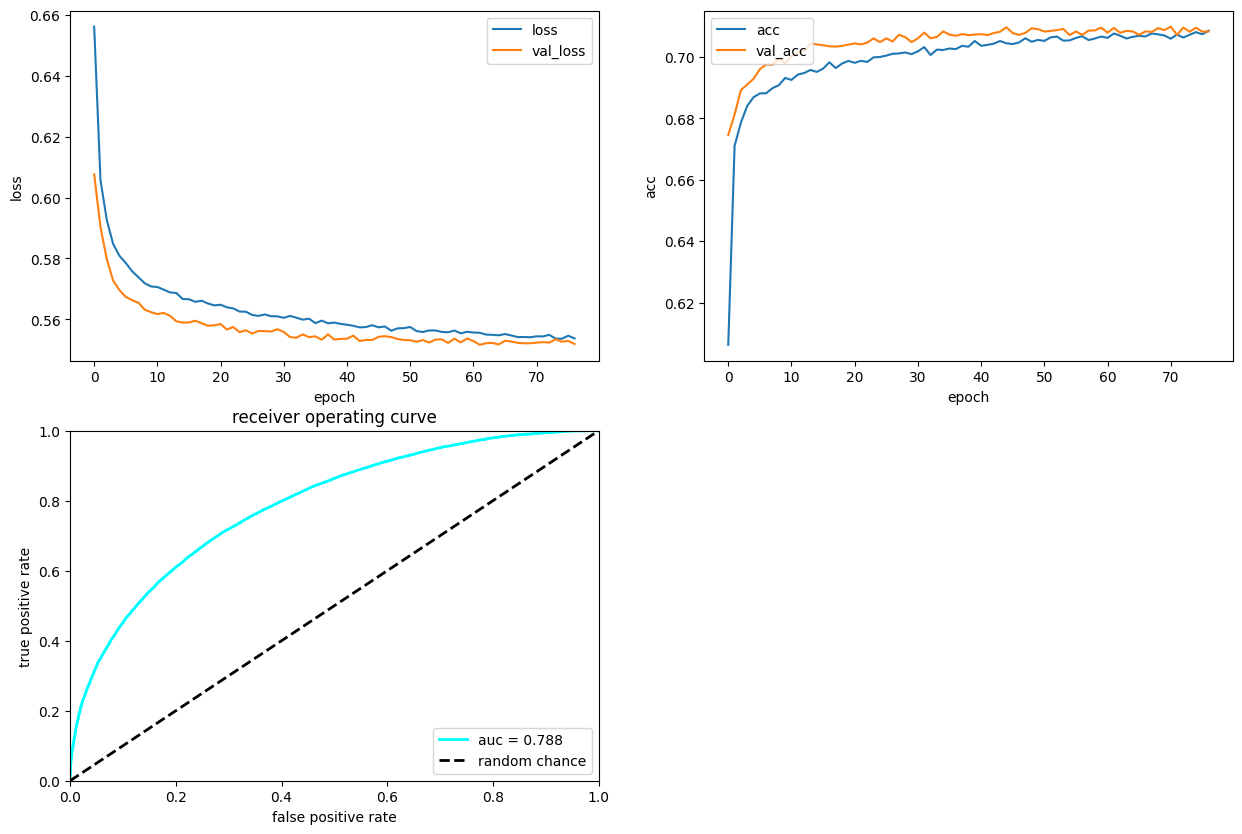

In [51]:
import matplotlib.pyplot as plt

%matplotlib inline
# plot loss vs epoch
plt.figure(figsize=(15, 10))
ax = plt.subplot(2, 2, 1)
ax.plot(history.history["loss"], label="loss")
ax.plot(history.history["val_loss"], label="val_loss")
ax.legend(loc="upper right")
ax.set_xlabel("epoch")
ax.set_ylabel("loss")

# plot accuracy vs epoch
ax = plt.subplot(2, 2, 2)
ax.plot(history.history["accuracy"], label="acc")
ax.plot(history.history["val_accuracy"], label="val_acc")
ax.legend(loc="upper left")
ax.set_xlabel("epoch")
ax.set_ylabel("acc")

# Plot ROC
Y_predict = model.predict(X_test)
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(Y_test, Y_predict)
roc_auc = auc(fpr, tpr)
ax = plt.subplot(2, 2, 3)
ax.plot(fpr, tpr, lw=2, color="cyan", label="auc = %.3f" % (roc_auc))
ax.plot([0, 1], [0, 1], linestyle="--", lw=2, color="k", label="random chance")
ax.set_xlim([0, 1.0])
ax.set_ylim([0, 1.0])
ax.set_xlabel("false positive rate")
ax.set_ylabel("true positive rate")
ax.set_title("receiver operating curve")
ax.legend(loc="lower right")
plt.show()

In [52]:
df["dense"] = model.predict(X)  # add prediction to array
print(df.loc[:30, ["lable", "dense"]])

6250/6250 ━━━━━━━━━━━━━━━━━━━━ 5s 833us/step
    lable     dense
0     1.0  0.690135
1     1.0  0.744833
2     1.0  0.947968
3     0.0  0.642996
4     1.0  0.420321
5     0.0  0.092710
6     1.0  0.958288
7     1.0  0.964127
8     1.0  0.779734
9     1.0  0.954868
10    1.0  0.686767
11    0.0  0.467183
12    1.0  0.942725
13    1.0  0.755485
14    1.0  0.914260
15    0.0  0.241940
16    1.0  0.480624
17    0.0  0.296478
18    0.0  0.747465
19    1.0  0.652568
20    1.0  0.909490
21    1.0  0.621881
22    0.0  0.435611
23    1.0  0.791600
24    0.0  0.470886
25    0.0  0.396951
26    1.0  0.864769
27    0.0  0.223731
28    1.0  0.645071
29    0.0  0.330175
30    1.0  0.490556


In [53]:
threshold = .6

final = np.zeros(df.shape[0])
for i in range(len(final)):
  if df.loc[i, "dense"] >= threshold:
    final[i] = 1.
  else:
    final[i] = 0.


success = 0
for i in range(len(final)):
  if df.loc[i, 'lable'] == final[i]:
    success += 1

print()
print('Threshold = %.2f' % (threshold))
print('Success Rate = %.3f' % (success/len(final)))


Threshold = 0.60
Success Rate = 0.698
